Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

These questions are similar to the questions you might ask in a game of 20 Questions. Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is “yes,” you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has fins.

This series of questions can be expressed as a decision tree, as shown below

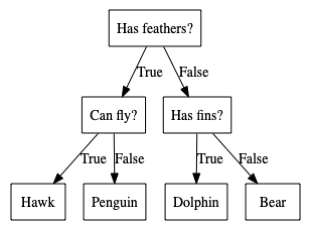

In [4]:
import mglearn
from sklearn.model_selection import train_test_split
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal node (also called a leaf) 
that contains the answer. The edges connect the answers to a question with the next question you would ask.

In machine learning parlance, we built a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn them from data using supervised learning.

The dataset consists of two half-moon shapes, with each class consisting of 75 data points. We will refer to this dataset as two_moons.

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most 
quickly. In the machine learning setting, these questions are called tests (not to be confused with the test set, 
which is the data we use to test to see how generalizable our model is). Usually data does not come in the form of \
binary yes/no features as in the animal example, but is instead represented as continuous features such as in\
the 2D dataset shown in the figure below. The tests that are used on continuous data are of the form “Is feature i\
larger than value a?

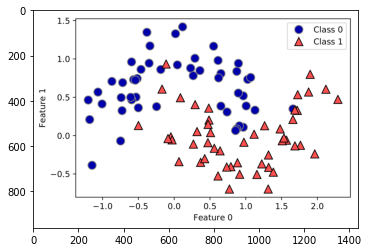

In [2]:
# show image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('22-3.png')
imgplot = plt.imshow(img)
plt.show()

To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the 
target variable. The figure below shows the first test that is picked. Splitting the dataset horizontally at x[1]=0
.0596 yields the most information; it best separates the points in class 0 from the points in class 1. The top node, \
        also called the root, represents the whole dataset, consisting of 50 points belonging to class 0 and 50 \
        points belonging to class 1. The split is done by testing whether x[1] <= 0.0596, indicated by a black line. \
        If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and \
        32 points belonging to class 1. Otherwise the point is assigned to the right node, which contains 48 points \
        belonging to class 0 and 18 points belonging to class 1. These two nodes correspond to the top and bottom \
        regions shown in the figure below. Even though the first split did a good job of separating the two classes, \
        the bottom region still contains points belonging to class 0, and the top region still contains points \
        belonging to class 1. We can build a more accurate model by repeating the process of looking for the best \
        test in both regions. The second figure below shows that the most informative next split for the left and the \
        right region is based on x[0].


In [ ]:
# show image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('depth1.png')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('depth2.png')
imgplot = plt.imshow(img)
plt.show()

This recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis. This yields a view of the algorithm as building a hierarchical partition. As each test concerns only a single feature, the regions in the resulting partition always have axis-parallel boundaries.

The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision 
tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that \
        contains data points that all share the same target value is called pure. The final partitioning for this \
        dataset is shown in the figure below.


In [2]:
import matplotlib.image as mpimg
img = mpimg.imread('depth9.png')
imgplot = plt.imshow(img)
plt.show()

NameError: name 'img' is not defined

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. The region can be found by traversing the tree from the root and going left or right, depending on whether the test is fulfilled or not.

It is also possible to use trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target of the training points in this leaf.

CONTROLLING COMPLEXITY OF DECISION TREES

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very \
        complex and highly overfit to the training data. The presence of pure leaves mean that a tree is 100% \
        accurate on the training set; each data point in the training set is in a leaf that has the correct majority 
class. The overfitting can be seen on the left of the figure above. You can see the regions determined to belong to \
        class 1 in the middle of all the points belonging to class 0. On the other hand, there is a small strip predicted as class 0 around the point belonging to class 0 to the very right. This is not how one would imagine the decision boundary to look, and the decision boundary focuses a lot on single outlier points that are far away from the other points in that class.

There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not post-pruning.

Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As always, we import the dataset and split it into a training and a test part. Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure). We fix the random_state in the tree, which is used for tie-breaking internally:


In [ ]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees 
are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, \
                                                                                                             which 
will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree 
after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked\
    (cf. Figures above where depth = 1 and depth = 9). Limiting the depth of the tree decreases overfitting. This 
leads to a lower 
accuracy on
the
training set, but an improvement on the test set:

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

ANALYZING DECISION TREES
We can visualize the tree using the export_graphviz function from the tree module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

We can read this file and visualize it, as seen in the figure below, using the graphviz module (or you can use any 
program that can read .dot files):

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good 
example of a machine learning algorithm that is easily explained to nonexperts. However, even with a tree of depth \
        four, as seen here, the tree can become a bit overwhelming. Deeper trees (a depth of 10 is not uncommon) are \
        even harder to grasp. One method of inspecting the tree that may be helpful is to find out which path most of\
        the data actually takes. The samples shown in each node in the figure above gives the number of samples in \
        that node, while value provides the number of samples per class. Following the branches to the right, we see that worst radius > 16.795 creates a node that contains only 8 benign but 134 malignant samples. The rest of this side of the tree then uses some finer distinctions to split off these 8 remaining benign samples. Of the 142 samples that went to the right in the initial split, nearly all of them (132) end up in the leaf to the very right.

Taking a left at the root, for worst radius <= 16.795 we end up with 25 malignant and 259 benign samples. Nearly all of the benign samples end up in the second leaf from the left, with most of the other leaves containing very few samples.

FEATURE IMPORTANCE IN TREES
Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:
    

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

We can visualize the feature importances in a way that is similar to the way we visualize the coefficients in the 
linear model (figure below):

In [ ]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Here we see that the feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.

However, if a feature has a low value in feature_importance_, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which 
class a feature is indicative of. The feature importances tell us that “worst radius” is important, but not whether a\
        high radius is indicative of a sample being benign or malignant. In fact, there might not be such a simple \
        relationship between features and class, as you can see in the following example (two figures below):

In [ ]:
# show image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('2-29.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The plot shows a dataset with two features and two classes. Here, all the information is contained in X[1], and X[0] is not used at all. But the relation between X[1] and the output class is not monotonous, meaning we cannot say “a high value of X[1] means class 0, and a low value means class 1” (or vice versa).

While we focused our discussion here on decision trees for classification, all that was said is similarly true for decision trees for regression, as implemented in DecisionTreeRegressor. The usage and analysis of regression trees is very similar to that of classification trees. There is one particular property of using tree-based models for regression that we want to point out, though. The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data.

Let’s look into this in more detail, using a dataset of historical computer memory (RAM) prices. Figure below shows the 
dataset, with the date on the x-axis and the price of one megabyte of RAM in that year on the y-axis:
    

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Note the logarithmic scale of the y-axis. When plotting logarithmically, the relation seems to be quite linear and so should be relatively easy to predict, apart from some bumps.

We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature. We will compare two simple models: a DecisionTreeRegressor and LinearRegression. We rescale the prices using a logarithm, so that the relationship is relatively linear. This doesn’t make a difference for the DecisionTreeRegressor, but it makes a big difference for LinearRegression (we will discuss this in more depth in Chapter 4). After training the models and making predictions, we apply the exponential map to undo the logarithm transform. We make predictions on the whole dataset for visualization purposes here, but for a quantitative evaluation we would only consider the test dataset:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Figure below, created here, compares the predictions of the decision tree and the linear regression model with the \
        ground truth:
    

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The difference between the models is quite striking. The linear model approximates the data with a line, as we knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data. The tree model, on the other hand, makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.

STRENGTHS, WEAKNESSES, AND PARAMETERS
As discussed earlier, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.

Decision trees have two advantages over many of the algorithms we’ve discussed so far: the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

2.3.6 Ensembles of Decision Trees
Ensembles are methods that combine multiple machine learning models to create more powerful models. There are many models in the machine learning literature that belong to this category, but there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boosted decision trees.

